In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [2]:
true = pd.read_csv('True.csv')
false = pd.read_csv('Fake.csv')

In [3]:
true['label'] = 1
false['label'] = 0

In [4]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
false.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
final = pd.concat([true, false])

In [8]:
final.to_excel('fakeNews.xlsx')

/Users/sohailsankanur/anaconda3/lib/python3.7/site-packages/xlsxwriter/worksheet.py:912: UserWarning: Ignoring URL 'https://www.youtube.com/watch?v=GPqQIlWksbgVermont%20Sen.%20Bernard%20Sanders%20told%20CNN%20Thursday%20that%20President%20Trump%20s%20plan%20to%20prioritize%20job%20creation%20over%20climate%20change%20regulations%20is%20%20stupid%20and%20dangerous.%20%20The%20commander%20in%20chief%20signed%20an%20%20Energy%20Independence%20%20executive%20order%20Tuesday%20as%20a%20means%20of%20rolling%20back%20former%20President%20Barack%20Obama%20s%20Clean%20Power%20Plan.%20Mr.%20Trump%20said%20his%20policies%20will%20cause%20%20wealth%20to%20pour%20into%20our%20communities,%20%20although%20Mr.%20Sanders%20frames%20it%20as%20a%20recipe%20for%20environmental%20disaster.%20%20%5bThis%20plan%20is%20a%5d%20nonsensical,%20and%20stupid,%20and%20dangerous%20approach,%20%20Mr.%20Sanders%20told%20CNN%20s%20Wolf%20Blitzer%20Thursday.%20%20It%20s%20almost%20indescribable.%20Look,%20the%20scienti

In [21]:
final.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [22]:
final.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [29]:
truevsfake = []
truevsfake.append(len(final[final['label'] == 1]))
truevsfake.append(len(final[final['label'] == 0]))
tflabel = ['true', 'false']

<BarContainer object of 2 artists>

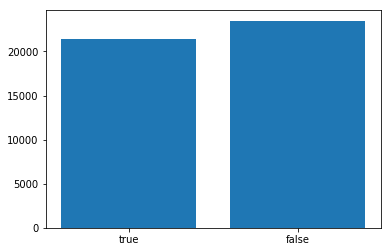

In [31]:
plt.bar(tflabel, truevsfake)

In [48]:
subjects = list(set(final['subject']))
subjects

['worldnews',
 'Government News',
 'politics',
 'Middle-east',
 'US_News',
 'politicsNews',
 'News',
 'left-news']

In [49]:
final['subject'].replace([0,1,2,3,4,5,6,7],subjects,inplace=True)

In [53]:
final.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [37]:
final.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [52]:
final.count()

title      44898
text       44898
subject    44898
date       44898
label      44898
dtype: int64

In [54]:
final['text'] = final['title'] + " " + final['text']

In [57]:
del final['title']
del final['date']

In [58]:
final.head()

,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,1
1,U.S. military to accept transgender recruits o...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,politicsNews,1


splitting data into test and train and making it into a numpy array then implementing tensorflow classification

In [122]:
from sklearn.model_selection import train_test_split
train_data ,test_data = train_test_split(final,test_size=0.5) 

In [123]:
train_data.head()

,text,subject,label
13705,BREAKING: Gay Bernie Sanders Supporter With Lo...,politics,0
18499,LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE D...,left-news,0
14916,"At U.N., North Korea says U.S. to blame for 'w...",worldnews,1
13996,YIKES! 30 Years Of HILLARY’S LIES Have Driven ...,politics,0
11146,TWITTER Posts Hilarious Images After Announcem...,politics,0


In [124]:
train_examples = train_data['text'].to_numpy()
train_labels = train_data['label'].to_numpy()

In [127]:
test_data.head()

,text,subject,label
4283,"There’s A Video Of Trump Saying The N-Word, A...",News,0
6745,China warns Trump against ignoring its Taiwan ...,politicsNews,1
20623,"Dutch government: 2 dead, 43 wounded on Saint ...",worldnews,1
19545,DID HILLARY Just Lose Her “Get Out Of Jail Fre...,left-news,0
4516,U.S. top court won't revive New Hampshire ball...,politicsNews,1


In [128]:
test_examples = test_data['text'].to_numpy()
test_labels = test_data['label'].to_numpy()

In [131]:
train_examples[:10]

array(['BREAKING: Gay Bernie Sanders Supporter With Long Rifle, Possible Explosives Arrested On Way to L.A. Gay Pride Festival The media will ignore the fact that this man was reportedly on his way to  harm gays  or that he appears to be a Bernie Sanders supporter. The media and Democrats will instead, be laser focused on the weapons and ammunition that were found in his possession. Democrats and other gun-control fanatics should be reminded that they are just inanimate objects until they end up in the hands of unstable Bernie Sanders supporters Authorities on Sunday were trying to determine the intentions of an Indiana man with a cache of weapons, ammunition and explosive-making materials in his car and apparent plans to attend the L.A. Pride festival in West Hollywood.Santa Monica Police Chief Jacqueline Seabrooks said on Twitter that the 20-year-old man told one of her officers after he was arrested that he wanted  to harm Gay Pride event.  But she did not provide any details, and o

In [132]:
train_labels[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

# Building a Model

In [133]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: id=1037, shape=(3, 20), dtype=float32, numpy=
array([[ 0.8577242 , -7.710284  ,  1.3333111 ,  4.1967254 ,  7.603886  ,
        -5.6965823 ,  1.0532401 ,  6.2265    ,  6.3930798 ,  6.0359125 ,
        -8.270041  ,  0.46164823, -6.23143   , -3.2986958 , -4.8238635 ,
        10.39581   , -0.8087634 , -7.056181  , -7.8104625 ,  4.5596795 ],
       [-0.18004383, -5.1648707 ,  8.73953   ,  0.70166576,  0.3684576 ,
        -4.5695567 ,  0.48440498,  1.2519305 ,  3.7915685 ,  0.6577332 ,
        -2.1847346 , -2.6294563 , -2.6462367 , -0.2766406 , -0.0116507 ,
         2.2255063 ,  5.009299  , -7.9167147 , -6.0915008 ,  1.3311852 ],
       [-2.8291442 ,  2.796183  ,  8.686679  , -1.4700463 ,  5.287846  ,
        -0.70447695,  1.7367013 , -0.08133144, -1.1354249 ,  0.8196021 ,
         2.7231014 , -3.2515354 , -3.7017858 ,  0.6991369 , -0.18470602,
         7.7933416 ,  0.53267276, -1.407198  , -2.4455917 ,  2.086429  ]],
      dtype=float32)>

In [148]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [149]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [136]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [137]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 12449 samples, validate on 10000 samples
Epoch 1/40
12449/12449 [==============================] - 5s 377us/sample - loss: 0.6826 - accuracy: 0.6361 - val_loss: 0.5105 - val_accuracy: 0.7507
Epoch 2/40
12449/12449 [==============================] - 3s 250us/sample - loss: 0.4441 - accuracy: 0.7964 - val_loss: 0.3985 - val_accuracy: 0.8302
Epoch 3/40
12449/12449 [==============================] - 3s 244us/sample - loss: 0.3591 - accuracy: 0.8463 - val_loss: 0.3380 - val_accuracy: 0.8620
Epoch 4/40
12449/12449 [==============================] - 3s 233us/sample - loss: 0.3043 - accuracy: 0.8765 - val_loss: 0.2944 - val_accuracy: 0.8848
Epoch 5/40
12449/12449 [==============================] - 3s 237us/sample - loss: 0.2626 - accuracy: 0.8997 - val_loss: 0.2592 - val_accuracy: 0.8988
Epoch 6/40
12449/12449 [==============================] - 3s 253us/sample - loss: 0.2277 - accuracy: 0.9161 - val_loss: 0.2291 - val_accuracy: 0.9103
Epoch 7/40
12449/12449 [==========================

In [147]:
results = model.evaluate(something, test_labels)

print(results)

22449/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0379666946946186, 0.98672545]


In [145]:
something = (test_examples, test_labels)